In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import xskillscore as xs
from sklearn import preprocessing
import cartopy.crs as ccrs
import matplotlib.ticker as ticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [2]:
def map_plot(ax1):
    ax1.coastlines()
    ax1.set_xticks([50,70,90,110], crs=ccrs.PlateCarree())
    ax1.set_yticks([ 0, 20,  40, 60], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

In [2]:
#era5

In [4]:
era5Data = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5NH_500_z_daily_NovDecJan.nc')

z=era5Data.z/9.81
z
era5=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31')).mean(dim='time').sel(latitude=slice(60,0),longitude=slice(50,110))
era5

<xarray.DataArray 'z' (latitude: 31, longitude: 31)>
array([[5284.6025, 5283.581 , 5282.723 , 5281.7217, 5280.6514, 5280.166 ,
        5278.3716, 5277.125 , 5275.719 , 5274.207 , 5272.528 , 5270.8965,
        5269.131 , 5267.4355, 5265.7417, 5263.9214, 5262.402 , 5260.4014,
        5258.2256, 5255.6064, 5252.476 , 5249.196 , 5245.1562, 5240.249 ,
        5235.308 , 5229.271 , 5222.8965, 5216.2646, 5209.424 , 5202.309 ,
        5194.8813],
       [5314.2593, 5313.829 , 5313.366 , 5312.898 , 5312.1216, 5312.0713,
        5310.917 , 5310.18  , 5309.3037, 5308.2744, 5306.9683, 5305.6484,
        5304.3477, 5302.9883, 5301.495 , 5300.2036, 5298.7334, 5297.07  ,
        5295.13  , 5292.667 , 5289.5107, 5285.6816, 5281.058 , 5275.644 ,
        5269.469 , 5262.537 , 5255.1104, 5246.922 , 5238.341 , 5229.532 ,
        5220.332 ],
       [5343.808 , 5343.779 , 5343.874 , 5343.7905, 5343.9897, 5344.152 ,
        5343.601 , 5343.4126, 5343.1997, 5342.6855, 5341.969 , 5340.9995,
        5339.9688, 5339.1274, 5338.1997, 5337.256 , 5336.414 , 5335.198 ,
        5333.354 , 5331.487 , 5328.558 , 5324.3813, 5319.3345, 5313.2676,
        5306.2583, 5298.0767, 5288.8237, 5278.814 , 5268.52  , 5257.247 ,
        5245.493 ],
       [5373.628 , 5374.047 , 5374.496 , 5374.709 , 5375.4204, 5375.817 ,
        5375.8257, 5376.082 , 5376.4536, 5376.47  , 5376.2236, 5376.033 ,
...
        5854.633 , 5854.294 , 5854.0107, 5853.5825, 5853.1455, 5853.0005,
        5853.06  ],
       [5856.7944, 5856.783 , 5856.706 , 5856.7607, 5856.7476, 5856.765 ,
        5856.6846, 5856.6113, 5856.3853, 5856.2827, 5856.1226, 5855.9453,
        5855.6865, 5855.374 , 5855.1187, 5854.816 , 5854.5303, 5854.2676,
        5854.0938, 5853.996 , 5853.7866, 5853.721 , 5853.335 , 5853.613 ,
        5854.3647, 5853.105 , 5852.287 , 5852.2583, 5851.804 , 5851.568 ,
        5851.555 ],
       [5855.9863, 5855.9307, 5855.965 , 5855.9624, 5856.018 , 5855.956 ,
        5855.9585, 5855.8555, 5855.808 , 5855.6587, 5855.554 , 5855.329 ,
        5855.1978, 5854.941 , 5854.692 , 5854.3945, 5854.171 , 5853.8857,
        5853.7417, 5853.577 , 5853.4204, 5853.229 , 5852.997 , 5852.879 ,
        5853.011 , 5852.946 , 5852.1626, 5851.865 , 5851.3633, 5851.181 ,
        5851.131 ],
       [5855.695 , 5855.764 , 5855.758 , 5855.778 , 5855.769 , 5855.77  ,
        5855.687 , 5855.698 , 5855.558 , 5855.5117, 5855.358 , 5855.291 ,
        5855.1025, 5854.9106, 5854.6562, 5854.415 , 5854.1553, 5853.9224,
        5853.6777, 5853.461 , 5853.2446, 5853.1274, 5852.894 , 5852.7827,
        5852.7295, 5852.3164, 5852.17  , 5851.9517, 5851.597 , 5851.3076,
        5851.285 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 50.0 52.0 54.0 56.0 ... 106.0 108.0 110.0
  * latitude   (latitude) float32 60.0 58.0 56.0 54.0 52.0 ... 6.0 4.0 2.0 0.0

In [ ]:
zLevData = xr.open_dataset('../../Data/CMIP6/EC-Earth3/processed/Regrid_zg_day_EC-Earth3_historical_r1i1p1f1_gr_18500101-20141231.nc')
zLevData
z=zLevData.sel(plev=50000,method='nearest').zg

#datetimeindex = z.indexes['time'].to_datetimeindex()
#datetimeindex
#z['time'] = datetimeindex

EC_Earth3=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31')).mean(dim='time')
EC_Earth3
r = EC_Earth3.copy()
r.values = EC_Earth3.values - era5.values 


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet')#,vmax=0.5,vmin=-0.5)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
map_plot(ax1)
ax1.coastlines()
ax1.set_title('EC_Earth3 Mean Bias')
fig.colorbar(m1,orientation='horizontal')




In [5]:
fileNames=['EC-Earth3/processed/Regrid_zg_day_EC-Earth3_historical_r1i1p1f1_gr_18500101-20141231.nc',
           'IPSL-CM6A-LR/NDJF/Regrid_NH_zg_NDJFday_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-20141231.nc',
           'ACCESS-CM2/zgNHRegrid_NDJFday_ACCESS-CM2_historical_r1i1p1f1_gn_19500101-20141231.nc',
           'ESM/historic/zgNHRegrid_NDJFday_IITM-ESM_historical_r1i1p1f1_gn_18500101-20141231.nc',
           'MPI-ESM1-2-LR/processed/Regrid_zg_day_MPI-ESM1-2-LR_historical_r1i1p1f1_gn_18500101-20141231.nc',
           'MIROC6/zgNHRegrid_NDJFday_MIROC6_historical_r1i1p1f1_gn_18500101-20141231.nc',
           'MRI-ESM2-0/processed/Regrid_zg_day_MRI-ESM2-0_historical_r1i1p1f1_gn_18500101-20141231.nc',
           'MPI-ESM1-2-HR/processed/Regrid_zg_day_MPI-ESM1-2-HR_historical_r1i1p1f1_gn_18500101-20141231.nc']
folderName=['EC-Earth3','IPSL-CM6A-LR/NDJF','ACCESS-CM2','IITM-ESM',
            'MPI-ESM1-2-LR','MIROC6','MRI-ESM2-0','MPI-ESM1-2-HR']
modelName=['EC_Earth3','IPSL_CM6A_LR','ACCESS_CM2','IITM_ESM',
           'MPI_ESM1_2_LR','MIROC6','MRI_ESM2_0','MPI_ESM1_2_HR']

#EC-Earth3

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1

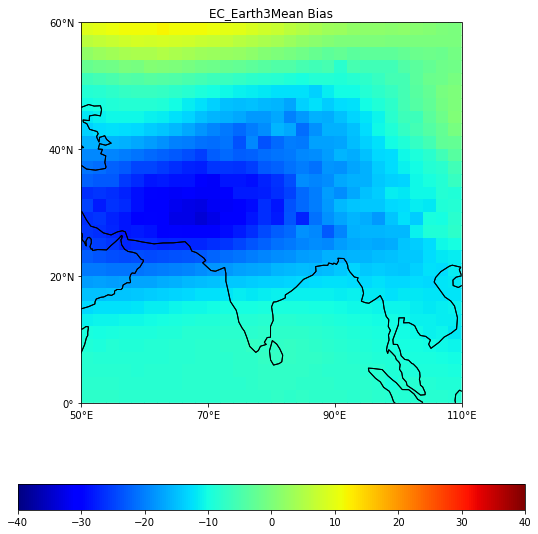

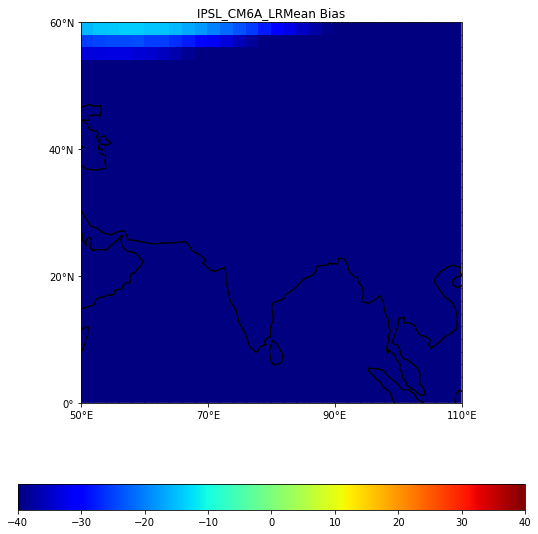

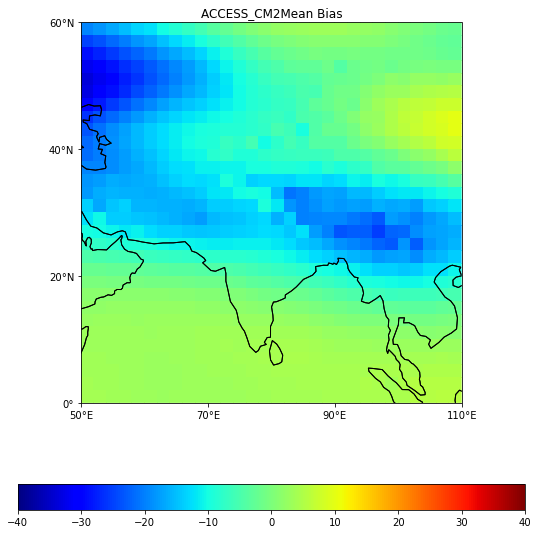

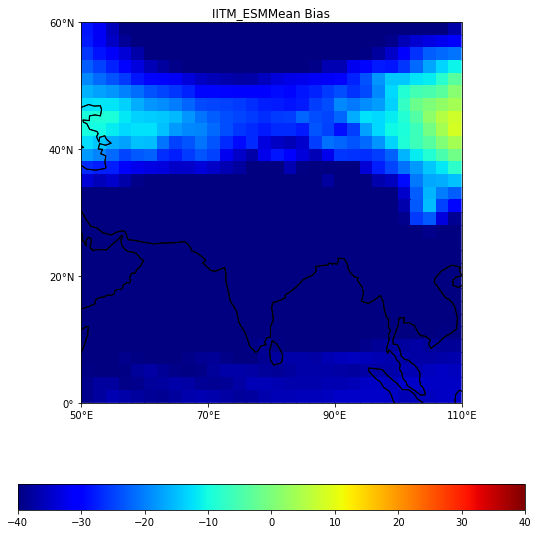

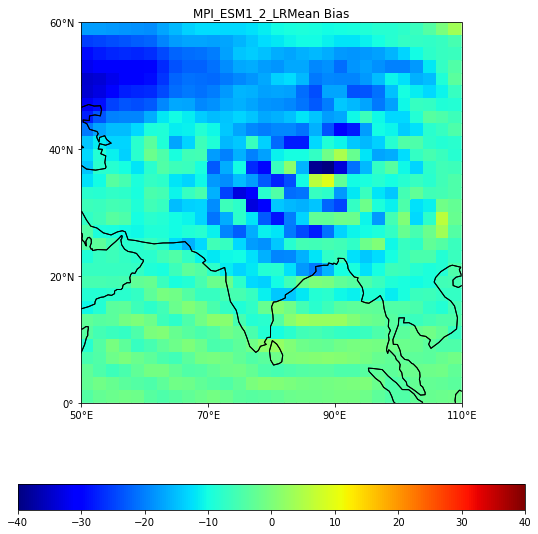

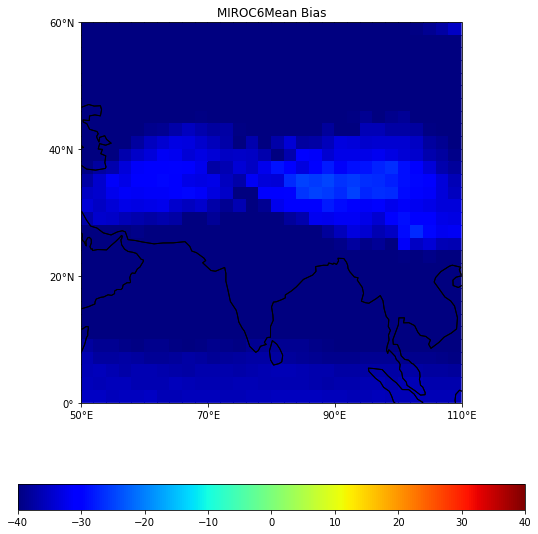

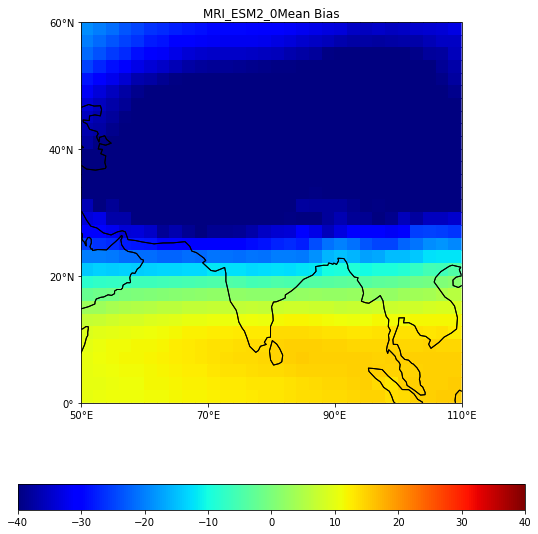

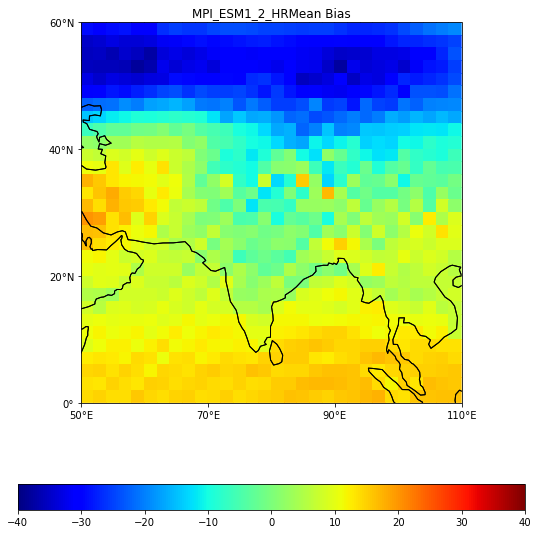

In [9]:
for fi,fo,m in zip(fileNames,folderName,modelName) :
    zLevData = xr.open_dataset('../../Data/CMIP6/'+fi)
    zLevData
    z=zLevData.sel(plev=50000,method='nearest').zg

#datetimeindex = z.indexes['time'].to_datetimeindex()
#datetimeindex
#z['time'] = datetimeindex

    EC_Earth3=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31')).mean(dim='time').sel(latitude=slice(60,0),longitude=slice(50,110))
    EC_Earth3
    r = EC_Earth3.copy()
    r.values = EC_Earth3.values - era5.values 


    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

    m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=40,vmin=-40)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
    map_plot(ax1)
    ax1.coastlines()
    ax1.set_title(m+'Mean Bias')
    fig.colorbar(m1,orientation='horizontal')
    

In [10]:
fileNames=['CANESM5/RegridNHzg_NDJFday_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc',
           'INM-CM4-8/processed/Regrid_zg_day_INM-CM4-8_historical_r1i1p1f1_gr1_18500101-20141231.nc',
           'INM-CM5-0/processed/Regrid_zg_day_INM-CM5-0_historical_r1i1p1f1_gr1_18500101-20141231.nc',]
folderName=['CANESM5',
            'INM-CM4-8','INM-CM5-0',]
modelName=['CANESM5',
           'INM_CM4_8','INM_CM5_0',]

<ipython-input-11-b4070cb8de45>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = z.indexes['time'].to_datetimeindex()
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
<ipython-input-11-b4070cb8de45>:6: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard ca

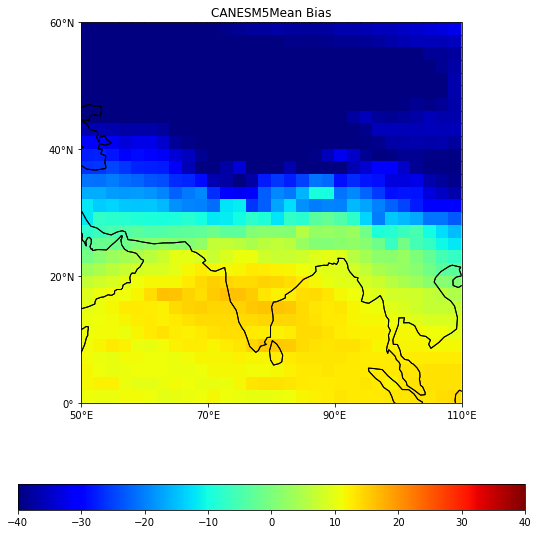

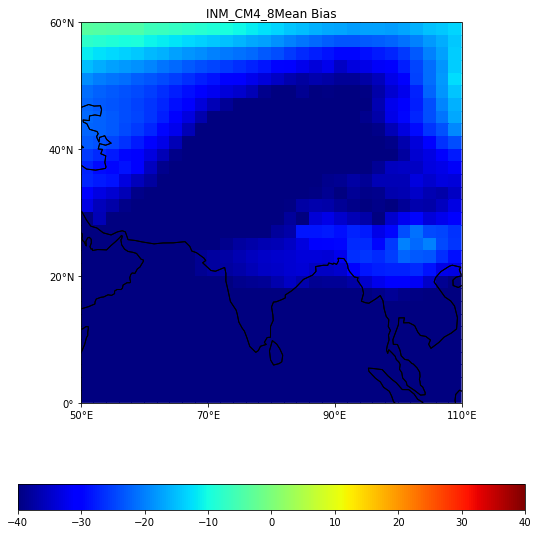

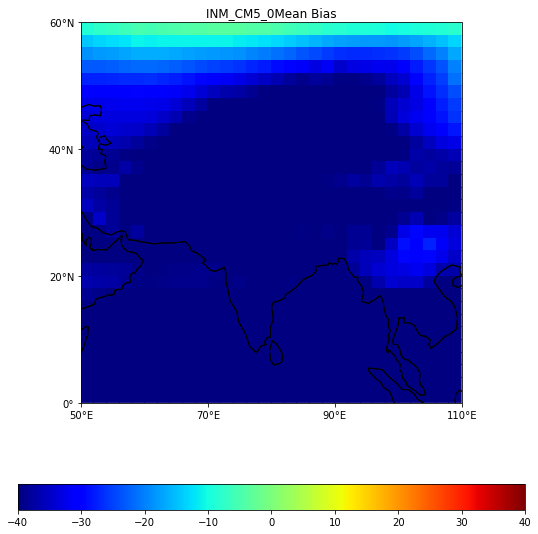

In [11]:
for fi,fo,m in zip(fileNames,folderName,modelName) :
    zLevData = xr.open_dataset('../../Data/CMIP6/'+fi)
    zLevData
    z=zLevData.sel(plev=50000,method='nearest').zg

    datetimeindex = z.indexes['time'].to_datetimeindex()
    datetimeindex
    z['time'] = datetimeindex

    EC_Earth3=z[((z.time.dt.month>11) | (z.time.dt.month<2)) & (z.time.dt.year<2020)].sel(time=slice('1980-1-1','2014-12-31')).mean(dim='time').sel(latitude=slice(60,0),longitude=slice(50,110))
    EC_Earth3
    r = EC_Earth3.copy()
    r.values = EC_Earth3.values - era5.values 


    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(121,projection=ccrs.PlateCarree())

    m1=ax1.pcolor(r.longitude.values,r.latitude.values,r,transform=ccrs.PlateCarree(),cmap='jet',vmax=40,vmin=-40)
#xr.plot.contour(zwideNeg.sel(latitude=slice(70,0),longitudegitude=slice(20,150)).mean(dim='time'),figsize=[10,5],levels=np.linspace(-60,60,21 ),colors ='black',   transform=ccrs.PlateCarree())
    map_plot(ax1)
    ax1.coastlines()
    ax1.set_title(m+'Mean Bias')
    fig.colorbar(m1,orientation='horizontal')
    